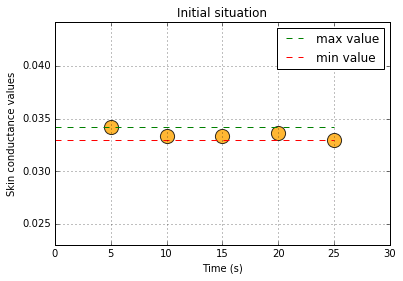

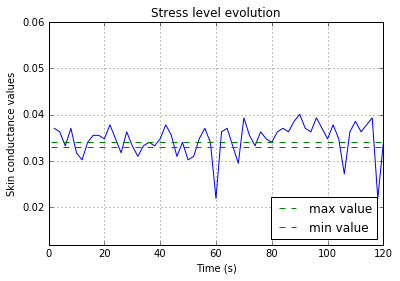

In [1]:
from pynq.pl import Overlay
Overlay("audiovideo.bit").download()
%matplotlib inline
from IPython import display
from pynq.pmods import Grove_ADC
import time
import numpy as np
import matplotlib.pyplot as plt
grove_adc = Grove_ADC(1, 4)
from pynq.board import LED
from pynq.audio import Headphone
from threading import Thread


led0=LED(0)
led1=LED(1)
led2=LED(2)
led3=LED(3)



time.sleep(5)
count=0
temp=5*[0]
v_medio=[]

time.sleep(1)
while True:
    if (count==5):
        led0.on()
    elif (count==10):
        led1.on()
    elif (count==15):
        led2.on()
    elif (count==20):
        led3.on()
    temp.pop(0)
    temp.append(grove_adc.read())
    time.sleep(1)
    count=count+1
    if (((count%5)==0)and(count!=0)):
        v_medio.append(sum(temp)/5)
    if count==25:
        break
x_time=[x for x in range(1,26) if x%5==0]
x_val=np.arange(0,26,1)
h_max=26*[max(v_medio)]
h_min=26*[min(v_medio)]
plt.scatter(x_time,v_medio,s=200,c='orange',alpha=0.8)
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Skin conductance values')
plt.title('Initial situation')
plt.axis([0,30,min(v_medio)-0.01,max(v_medio)+0.01])
line_max, =plt.plot(x_val,h_max,'g--')
line_min, =plt.plot(x_val,h_min,'r--')
plt.legend([line_max,line_min],['max value','min value'])
plt.show()


led0.off()
led1.off()
led2.off()
led3.off()



headphone = Headphone()
audio= np.load("audiorelax1.npy")


stop=False
play=False
thRunning = False

  

def playSound():
    global play
    global stop
    while(thRunning):
        if play and not stop:
            while True:
                 for sample in audio:
                     headphone([sample*10,sample*10]) 
                     l=[]
                     
                     if stop:
                        break
                
                 if stop:
                    break
        

                
th = Thread(target=playSound)
thRunning = True
play=True
th.start()


time.sleep(5)

temp2=2*[0]
count2=0
v_medio2=[]
time.sleep(1)
duration=120
while True:
    if (count2==0):
        led0.on()
    elif (count2==duration/4):
        led1.on()
    elif (count2==duration/2):
        led2.on()
    elif (count2==(duration*3)/4):
        led3.on()
    temp2.pop(0)
    temp2.append(grove_adc.read())
    time.sleep(1)
    count2=count2+1
    if count2==duration+1:
        break
    if (((count2%2)==0)and(count2!=0)):
        v_medio2.append(sum(temp2)/2)
        
x_time2=[x for x in range(1,duration+1) if x%2==0]
x_val2=np.arange(1,duration+1,1)
h_max2=duration*[max(v_medio)]
h_min2=duration*[min(v_medio)]
plt.plot(x_time2,v_medio2,c='b')
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Skin conductance values')
plt.title('Stress level evolution')
line_max2, =plt.plot(x_val2,h_max2,'g--')
line_min2, =plt.plot(x_val2,h_min2,'r--')
plt.legend([line_max2,line_min2],['max value','min value'],loc=4)
plt.axis([0,120,min(v_medio2)-0.01,max(v_medio2)+0.02])
plt.show()

stop=True

led0.off()
led1.off()
led2.off()
led3.off()

